In [18]:
import kernel
import numpy as np
import scipy
import matplotlib as plt
import sklearn
import johnson
import matplotlib.pyplot as plt
import time

seed = 1048596
rng = np.random.default_rng(seed)

# I. Goodness of fit of the Johnson's approximation

In [19]:
MMDs = []
n_MMD = 1_000
n = 1_000
m = 10_000

for k in range(n_MMD):
    rng = source_rng.spawn(1)[0]
    X = rng.multivariate_normal(np.zeros(2), np.eye(2), n)
    Y = rng.multivariate_normal(np.zeros(2), np.eye(2), n)
    mmd = rbf.MMD_2_U(X, Y)
    MMDs.append(mmd)

MMDs = np.array(MMDs)

X = source_rng.multivariate_normal(np.zeros(2), np.eye(2), m)
Y = source_rng.multivariate_normal(np.zeros(2), np.eye(2), m)
moments = rbf.moments_MMD_2_U(X, Y)
distrib = johnson.fit_johnsonsu_by_moments(*moments)

NameError: name 'source_rng' is not defined

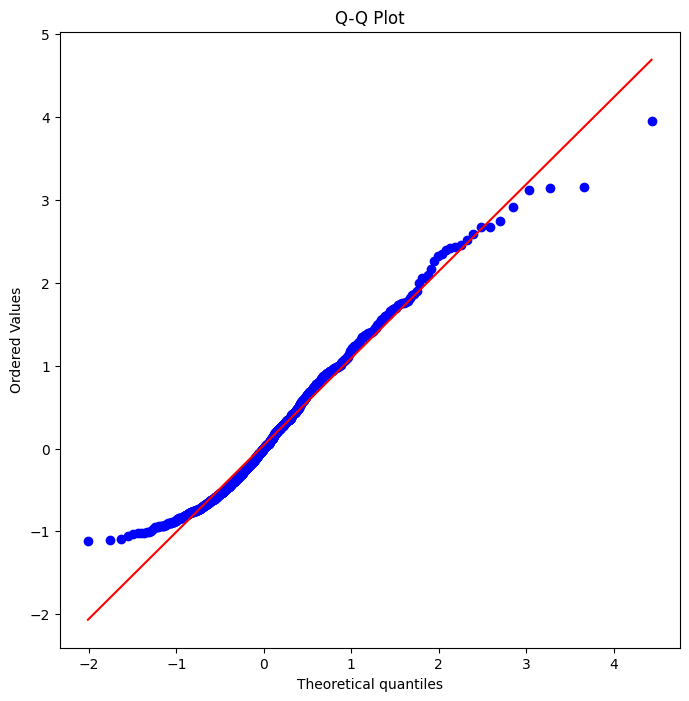

In [ ]:
plt.figure(figsize=(8, 8))
scipy.stats.probplot(MMDs, dist=distrib, plot=plt)
plt.title('Q-Q Plot')
plt.show()

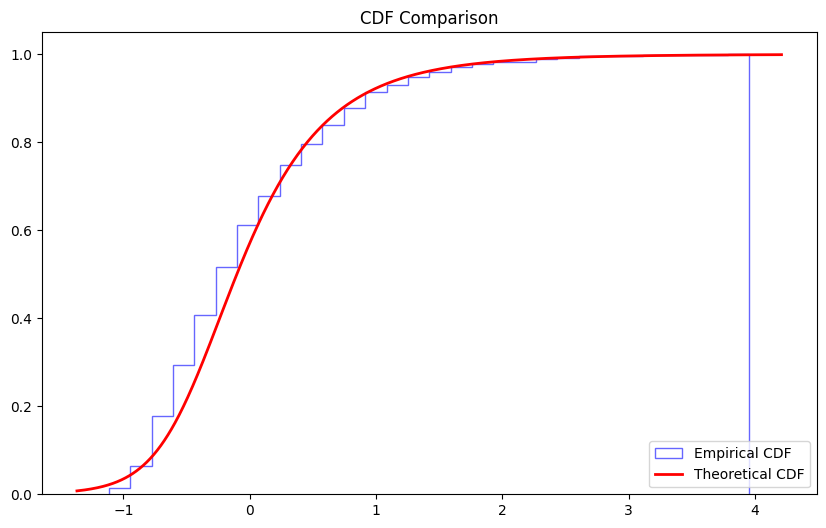

In [ ]:
plt.figure(figsize=(10, 6))

# Empirical CDF
plt.hist(MMDs, bins=30, density=True, cumulative=True, 
         alpha=0.6, color='b', histtype='step', label='Empirical CDF')

# Theoretical CDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, distrib.cdf(x), 'r-', lw=2, label='Theoretical CDF')

plt.title('CDF Comparison')
plt.legend(loc='lower right')
plt.show()

In [ ]:
ks_statistic, p_value = scipy.stats.kstest(MMDs, distrib.cdf)
print(p_value)

0.03538802793181983


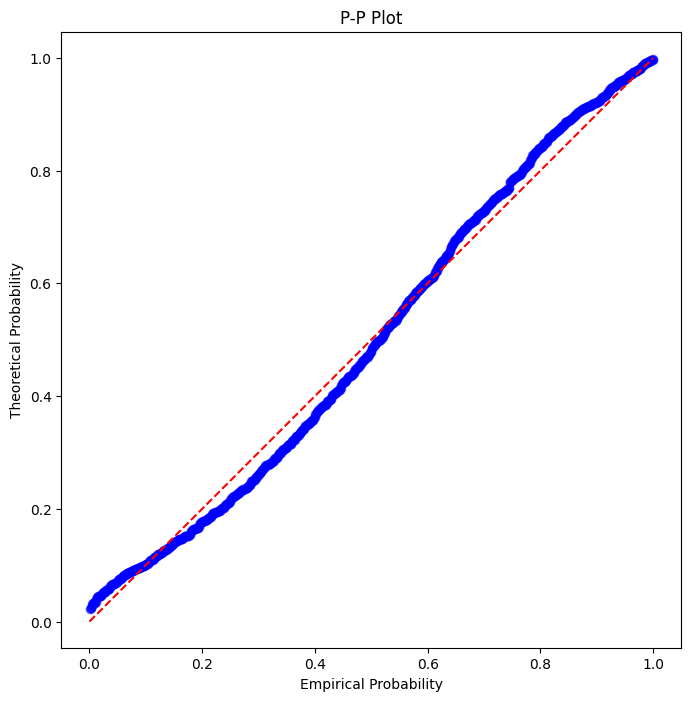

In [ ]:
plt.figure(figsize=(8, 8))

# Calculate empirical and theoretical CDF values
sample_sorted = np.sort(MMDs)
ecdf = np.arange(1, len(MMDs)+1) / len(MMDs)
tcdf = distrib.cdf(sample_sorted)

# Plot
plt.plot(ecdf, tcdf, 'bo', alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')  # Reference line
plt.xlabel('Empirical Probability')
plt.ylabel('Theoretical Probability')
plt.title('P-P Plot')
plt.axis('equal')
plt.show()

# II. Synthetic data

In [ ]:
def wilson_interval(k, n, confidence=0.95):
    p_hat = k / n
    z = scipy.stats.norm.ppf(1 - (1 - confidence)/2)
    center = (p_hat + z**2/(2*n)) / (1 + z**2/n)
    margin = z * np.sqrt((p_hat*(1 - p_hat)/n + z**2/(4*n**2)) / (1 + z**2/n))
    lower = np.maximum(0, center - margin)
    upper = np.minimum(1, center + margin)
    return center, lower, upper

In [ ]:
P = 200
alpha = 0.05
rbf = kernel.GaussianKernel()

## A) One-dimensional gaussians

In [ ]:
rng = np.random.default_rng(seed)

sigma_min, sigma_max = 0.505, 0.66
n_sigma = 10
n_rep = 100
n = 500


tests = [lambda X, Y, rng: rbf.test_MMD_2_U_M(X, Y, alpha),
lambda X, Y, rng: rbf.test_mmd_nystrom_uniform(X, int(np.sqrt(X.shape[0]) / 2), Y, int(np.sqrt(Y.shape[0]) / 2), alpha, P, rng),
lambda X, Y, rng: int(scipy.stats.ks_2samp(X, Y).pvalue[0] <= alpha)]
test_names = ["MMD²-U-M", "Nyström MMD", "KS Test"]

results = np.zeros((n_sigma, n_rep, len(tests)))

for i, sigma in enumerate(np.linspace(sigma_min, sigma_max, n_sigma)):
    for j in range(n_rep):
        X = rng.normal(0, 0.5, n).reshape(-1, 1)
        Y = rng.normal(0, sigma, n).reshape(-1, 1)
        rbf.fit_bandwidth(X, Y, 500)
        for k in range(len(tests)):
            results[i, j, k] = tests[k](X, Y, rng)

0


/usr/local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:5916: RuntimeWarning: overflow encountered in multiply
  g1 = -t1 * (t2 + t3) / denom
/usr/local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:5919: RuntimeWarning: overflow encountered in multiply
  t2 = 4*expbn2**2 * (expbn2 + 2) * np.cosh(2*a_b)
/usr/local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:5920: RuntimeWarning: overflow encountered in multiply
  t3 = expbn2**2 * np.cosh(4*a_b)
/usr/local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:5921: RuntimeWarning: overflow encountered in power
  t4 = -3 + 3*expbn2**2 + 2*expbn2**3 + expbn2**4
/usr/local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:5922: RuntimeWarning: overflow encountered in square
  denom = 2*(1 + expbn2*np.cosh(2*a_b))**2
/usr/local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:5923: RuntimeWarning: invalid value encountered in divide
  g2 = (t1 + t2 + t

1
2


/usr/local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:5910: RuntimeWarning: overflow encountered in cosh
  mu2 = 0.5*sc.expm1(bn2)*(expbn2*np.cosh(2*a_b) + 1)
/usr/local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:5915: RuntimeWarning: overflow encountered in cosh
  denom = np.sqrt(2) * (1 + expbn2 * np.cosh(2*a_b))**(3/2)
/usr/local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:5919: RuntimeWarning: overflow encountered in cosh
  t2 = 4*expbn2**2 * (expbn2 + 2) * np.cosh(2*a_b)
/usr/local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:5922: RuntimeWarning: overflow encountered in cosh
  denom = 2*(1 + expbn2*np.cosh(2*a_b))**2


3


KeyboardInterrupt: 

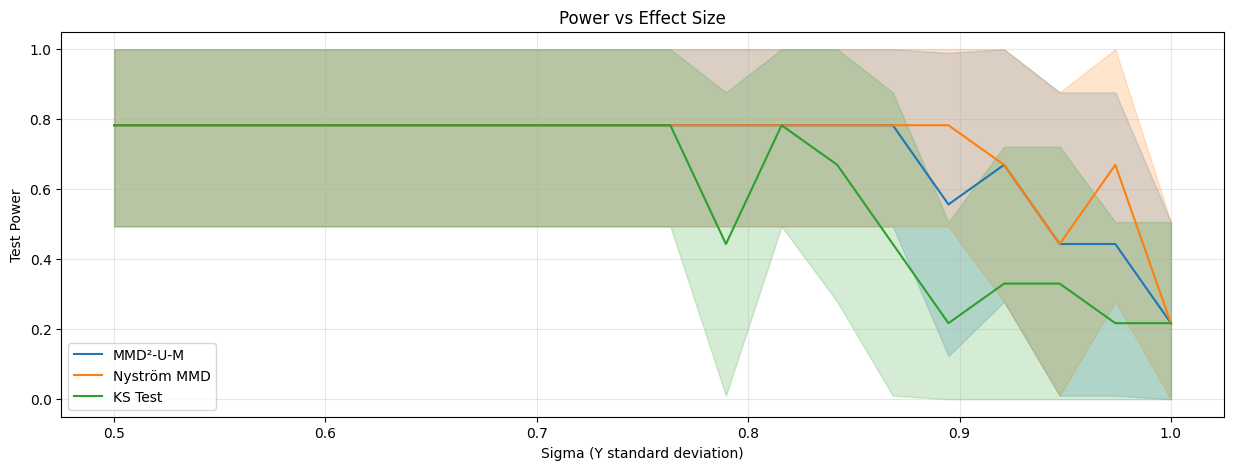

In [ ]:
dim_vals = np.linspace(sigma_min, sigma_max, n_sigma)
avg_times = times.mean(axis=1)  # Avg time per sigma per test
# Prepare plot data
power_vals = np.zeros((n_sigma, len(tests), 3))  # Center, lower, upper
for i in range(n_sigma):
    for k in range(len(tests)):
        rejections = results[i, :, k].sum()
        center, lower, upper = wilson_interval(rejections, n_rep)
        power_vals[i, k] = [center, lower, upper]

# Create plots
plt.figure(figsize=(15, 5))

# Plot 1: Power vs Sigma
colors = plt.cm.tab10.colors
for k in range(len(tests)):
    center = power_vals[:, k, 0]
    lower = power_vals[:, k, 1]
    upper = power_vals[:, k, 2]
    
    plt.plot(dim_vals, center, color=colors[k], label=test_names[k])
    plt.fill_between(dim_vals, lower, upper, color=colors[k], alpha=0.2)

plt.xlabel("Sigma (Y standard deviation)")
plt.ylabel("Test Power")
plt.title("Power vs Effect Size")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
rng = np.random.default_rng(seed)

sigma = 0.6
n_rep = 10
n_sizes = 10
times = np.zeros((n_sigma, n_rep, len(tests)))
sample_sizes = np.exp(np.linspace(np.log(100), np.log(20_000), n_sizes)).astype(int)

for i, n in enumerate(sample_sizes):
    print(i)
    for j in range(n_rep):
        X = rng.normal(0, 0.5, n).reshape(-1, 1)
        Y = rng.normal(0, sigma, n).reshape(-1, 1)
        for k in range(len(tests)):
            t = time.perf_counter()
            tests[k](X, Y, rng)
            times[i, j, k] = time.perf_counter() - t

0
1
2
3
4


/usr/local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:5916: RuntimeWarning: overflow encountered in multiply
  g1 = -t1 * (t2 + t3) / denom
/usr/local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:5919: RuntimeWarning: overflow encountered in multiply
  t2 = 4*expbn2**2 * (expbn2 + 2) * np.cosh(2*a_b)
/usr/local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:5921: RuntimeWarning: overflow encountered in power
  t4 = -3 + 3*expbn2**2 + 2*expbn2**3 + expbn2**4
/home/onyxia/work/Efficient-Kernel-Based-Two-Sample-Testing/src/johnson.py:14: RuntimeWarning: overflow encountered in scalar power
  return (m - mean)**2 + (v - var)**2 + (s - skew)**2 + (k - kurt)**2
/usr/local/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:596: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


5


/usr/local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:5923: RuntimeWarning: overflow encountered in multiply
  g2 = (t1 + t2 + t3*t4) / denom - 3


6
7
8
9


/usr/local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:5904: RuntimeWarning: overflow encountered in exp
  expbn2 = np.exp(bn2)
/usr/local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:5908: RuntimeWarning: overflow encountered in sinh
  mu = -expbn2**0.5 * np.sinh(a_b)
/usr/local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:5910: RuntimeWarning: overflow encountered in cosh
  mu2 = 0.5*sc.expm1(bn2)*(expbn2*np.cosh(2*a_b) + 1)
/usr/local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:5913: RuntimeWarning: overflow encountered in sinh
  t2 = 3*np.sinh(a_b)
/usr/local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:5914: RuntimeWarning: overflow encountered in sinh
  t3 = expbn2 * (expbn2 + 2) * np.sinh(3*a_b)
/usr/local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:5915: RuntimeWarning: overflow encountered in cosh
  denom = np.sqrt(2) * (1 + expbn2 * np.cosh(2*a_b))**(3/2)
/usr/local/

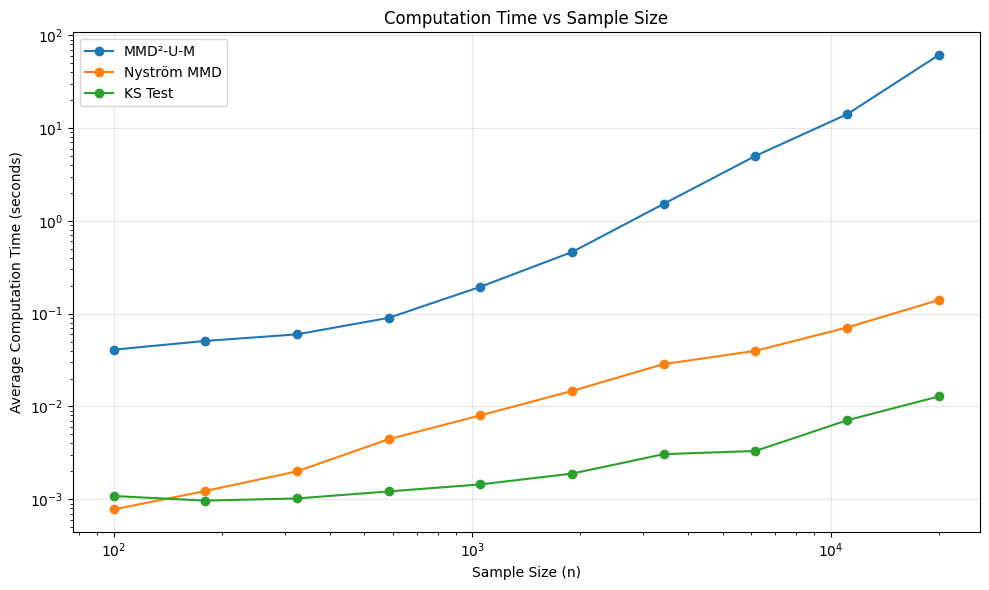

In [ ]:
# Compute average times over repetitions
avg_times = times.mean(axis=1)  # Shape: (n_sample_sizes, len(tests))

# Create plot
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors  # Different color for each test

for k in range(len(tests)):
    plt.plot(sample_sizes, avg_times[:, k], 
             color=colors[k % len(colors)],
             marker='o',
             linestyle='-',
             label=test_names[k])

plt.xlabel('Sample Size (n)')
plt.ylabel('Average Computation Time (seconds)')
plt.title('Computation Time vs Sample Size')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

## B) Multidimensional gaussians

In [ ]:
rng = np.random.default_rng(seed)

sigma_min, sigma_max = 0.505, 0.66
n_sigma = 10
n_rep = 100
n = 500


tests = [lambda X, Y, rng: rbf.test_MMD_2_U_M(X, Y, alpha),
lambda X, Y, rng: rbf.test_mmd_nystrom_uniform(X, int(np.sqrt(X.shape[0]) / 2), Y, int(np.sqrt(Y.shape[0]) / 2), alpha, P, rng)]
test_names = ["MMD²-U-M", "Nyström MMD"]

results = np.zeros((n_sigma, n_rep, len(tests)))

for i, sigma in enumerate(np.linspace(sigma_min, sigma_max, n_sigma)):
    for j in range(n_rep):
        X = rng.normal(np.zeros(3), 0.5 * np.eye(3), n)
        Y = rng.normal(np.zeros(3), np.eye(3) + sigma * (1 - np.eye(3)), n)
        rbf.fit_bandwidth(X, Y, 500)
        for k in range(len(tests)):
            results[i, j, k] = tests[k](X, Y, rng)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
dim_vals = np.linspace(sigma_min, sigma_max, n_sigma)
avg_times = times.mean(axis=1)  # Avg time per sigma per test
# Prepare plot data
power_vals = np.zeros((n_sigma, len(tests), 3))  # Center, lower, upper
for i in range(n_sigma):
    for k in range(len(tests)):
        rejections = results[i, :, k].sum()
        center, lower, upper = wilson_interval(rejections, n_rep)
        power_vals[i, k] = [center, lower, upper]

# Create plots
plt.figure(figsize=(15, 5))

# Plot 1: Power vs Sigma
colors = plt.cm.tab10.colors
for k in range(len(tests)):
    center = power_vals[:, k, 0]
    lower = power_vals[:, k, 1]
    upper = power_vals[:, k, 2]
    
    plt.plot(sigma_vals, center, color=colors[k], label=test_names[k])
    plt.fill_between(sigma_vals, lower, upper, color=colors[k], alpha=0.2)

plt.xlabel("Sigma (Y standard deviation)")
plt.ylabel("Test Power")
plt.title("Power vs Effect Size")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
rng = np.random.default_rng(seed)

n_rep = 20
n = 500
n_dims = 20
dims = np.exp(np.linspace(np.log(3), np.log(1000), n_dims)).astype(int)

tests = [lambda X, Y, rng: rbf.test_MMD_2_U_M(X, Y, alpha),
lambda X, Y, rng: rbf.test_mmd_nystrom_uniform(X, int(np.sqrt(X.shape[0]) / 2), Y, int(np.sqrt(Y.shape[0]) / 2), alpha, P, rng)]
test_names = ["MMD²-U-M", "Nyström MMD"]

results = np.zeros((n_sigma, n_rep, len(tests)))

for i, dim in enumerate(np.linspace(sigma_min, sigma_max, n_sigma)):
    for j in range(n_rep):
        X = rng.normal(np.zeros(dim), 0.5 * np.eye(dim), n)
        Y = rng.normal(np.ones(dim) / np.sqrt(dim), 0.5 * np.eye(dim), n)
        rbf.fit_bandwidth(X, Y, 500)
        for k in range(len(tests)):
            results[i, j, k] = tests[k](X, Y, rng)

In [ ]:
# Compute average times over repetitions
powers = results.mean(axis=1)  # Shape: (n_sample_sizes, len(tests))

# Create plot
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors  # Different color for each test

for k in range(len(tests)):
    plt.plot(dims, powers[:, k], 
             color=colors[k % len(colors)],
             marker='o',
             linestyle='-',
             label=test_names[k])

plt.xlabel('Dimension')
plt.ylabel('Power')
plt.title('Power vs Dimension')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()